# Catenaria y Parábola

## Mecánica para Ingenieros. Grado en Ingeniería Civil. 

+ Alejandro E. Martínez Castro (Desarrollador principal, email:amcastro@ugr.es).
+ Germán Rodríguez Salido.
+ Manuel Chiachío Ruano
+ Rafael Bravo Pareja.
+ Rafael Muñoz Beltrán. 
+ Gracia Rodríguez Jerónimo.

_Departamento de Mecánica de Estructuras e Ingeniería Hidráulica_

_Universidad de Granada_


<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">licencia de Creative Commons Reconocimiento-NoComercial 4.0 Internacional</a>.

# Objetivos de este cuaderno

- Uso de NumPy y solvers de raíces no lineales en problemas de catenarias.  
- Uso de SymPy para integración analítica y expansión en serie

# Catenaria
## Catenaria definida por dos puntos a la misma altura

Supongamos que conocemos: 

- Luz $l$. 
- Flecha $f$.

Deseamos determinar la ecuación de la catenaria. $$y(x) = c \,\cosh \left(\dfrac{l}{2c} \right)$$

En clase se ha visto que para resolver este problema, debemos resolver esta ecuación: 

\begin{equation}
f + c = c \,\cosh \left( \dfrac{l}{2\,c}\right)
\end{equation}

y de aquí, resolver el valor de $c$. 

Esto puede hacerse, en general, mediante métodos numéricos, como el [Método de Newton-Raphson](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Newton). 

Veamos a continuación cómo implementar este problema en Python.

In [1]:
import numpy as np

def funcion(c):
    return f + c - c*np.cosh(l/(2*c))

A continuación utilizaremos el método de Newton Raphson con unos datos. Esto puede hacerse directamente utilizando una función específica, ya implementada en la librería de cálculo científico `SciPy`, y a su vez, dentro de `Optimize`.

Para encontrar esta información, basta entrar en Google y escribir "Solve Newton Raphson python". Uno de los enlaces lleva a la [ayuda directa de SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

In [7]:
from scipy import optimize

f = 5
l = 20
c0 = 1 # Punto inicial de prueba para inicializar el método de Newton-Raphson
c_catenaria = optimize.newton(funcion, c0)
c_catenaria

10.743201882596088

A continuación verificaremos que, en efecto, la catenaria pasa por el punto

In [3]:
def catenaria(x):
    return c_catenaria * np.cosh (x / c_catenaria)

Evaluemos el valor de la catenaria en $x=l/2$:

In [4]:
catenaria(l/2) 

15.743201882596095

Nótese que este valor debe coincidir precisamente con el valor $f + c$. 

In [5]:
f + c_catenaria

15.743201882596088

Y en efecto, coincide. 

Pruebe modificar, a modo de laboratorio numérico, los datos de partida, o el punto inicial del método. 

En este ejemplo puede comprobar que lo importante como usuario es saber buscar la información que lleve a la librería adecuada que realice la función matemática que se desea realizar. Es importante también saber chequear que los resultados obtenidos son coherentes, y esto es algo que debe hacerse con cualquier método numérico. 

Python proporciona herramientas eficientes, a través de librerías específicas, para cada caso. 

Antes de implementar por sí mismo un método, pruebe si ya existe ese método en las librerías del ecosistema de Python, preguntando en un buscador como Google. Si lo está, que es habitua, ahorrará tiempo y recursos. 


## Catenaria que pasa por dos puntos a distinta altura

Consideremos que son dato: 
- La diferencia de coordenadas $x$ de los puntos: $x_B-x_A = l$
- La diferencia de coordenadas $y$ de los puntos: $y_B-y_A = \Delta y$
- La longitud total del hilo $L$

La forma de proceder es la siguiente: consideremos el problema resuelto, y que la catenaria tiene por solución: 

\begin{equation}
y(x) = c \,\cosh(\frac{x}{c})
\end{equation}

Si $x_B$ es la abscisa del punto $B$, la del punto $A$ será $x_A = x_B - l$. 

Considerando como incógnitas $x_B$ y $c$, pueden plantearse dos ecuaciones:

\begin{align}
\Delta y & = c\,\cosh(\frac{x_B}{l}) - c \,\cosh({x_B - l}{c}) \\
L & = c\,\sinh(\frac{x_B}{l}) - c \,\sinh({x_B - l}{c})
\end{align}

Estas dos ecuaciones pueden resolverse a la vez, mediante un solver no lineal. 

A continuación se planteará un caso

In [8]:
longitud = 10 # Longitud de la catenaria: debe ser mayor que la distancia (xB-XA)
l = 8 # Distancia xB - XA
dy = 2 # Distancia yB - yA

# x = x de B
def lon(c,x):
    return longitud - ( c * np.sinh(x/c) - c * np.sinh((x - l)/c) )

def dify(c,x):
    return dy - ( c * np.cosh(x / c) - c * np.cosh((x-l)/c) )

def equations(p):
    c, x = p
    return (lon(c,x), dify(c,x))

En esta ocasión se realizará una optimización de las dos funciones a la vez, mediante `fsolve´

In [9]:
from scipy.optimize import fsolve
c_sol, x_b =  fsolve(equations, (1, 1))
print(c_sol, x_b)

3.55518654097 4.72075204759


Y una vez resuelto $c$ y $x_B$, puede obtenerse la coordenada $x_A$. 

In [10]:
xA = l - x_b
print (xA)

3.27924795241


# Parábola. 

In [11]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.0 (Python 3.6.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


En primer lugar, definiremos los símbolos, adicionales a los que SymPy ha cargado por defecto

In [12]:
c, T0, P0 = symbols('c,T_0,P_0') 

In [13]:
T0

Definiremos la función $y(x)$

In [14]:
y = 1 / (2*c)* x** 2

In [15]:
y

La pendiente se obtendrá por derivación:

In [16]:
diff(y,x)

La longitud del arco se obtendrá por integración: 

\begin{equation}
s = \int_{0}^{x} \sqrt{1 + (y'(x))^2}\,dx
\end{equation}

In [17]:
import sympy
expr = sqrt(1 + diff(y,x)**2)

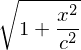

In [18]:
expr

In [19]:
arco = integrate(expr,x)

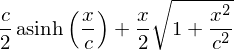

In [20]:
arco

In [22]:
print (barco)

c*asinh(x/c)/2 + x*sqrt(1 + x**2/c**2)/2


Puede verse que la expresión anterior coincide con la expresión vista en la asignatura, puesto que

\begin{equation}
\mathrm{asinh}\left(\dfrac{x}{c} \right) = \mathrm{ln} \left(\dfrac{x}{c} + \sqrt{1 + \left(\dfrac{x}{c}\right)^2} \right)
\end{equation}

Como puede verse en [este enlace a Wikipedia](https://es.wikipedia.org/wiki/Funci%C3%B3n_hiperb%C3%B3lica#Derivaci.C3.B3n_e_integraci.C3.B3n)

Podemos obtener una expansión en serie en torno a $x=0$, 

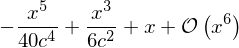

In [23]:
series(arco,x)

Nótese que esta expresión coincide con la expansión vista en la asignatura

## Expansión en serie de una catenaria

Con el comando `series` podemos encontrar también la expansión en serie de una catenaria. 
   

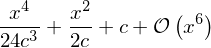

In [24]:
series(c*cosh(x/c),x)

Se observa que la expansión hasta orden cuadrático es: 

\begin{equation}
y = c + \dfrac{x^2}{2\,c}
\end{equation}

y basta una adecuada elección del origen de abscisas (colocándolo en el vértice) para obtener la conocida expresión de la parábola: 

\begin{equation}
y(x) = \dfrac{x^2}{2\,c}
\end{equation}